In [1]:
import pandas as pd
import numpy as np

In [2]:
ds = pd.read_csv('routes.csv')
ds.head()



,airline,airline ID,source airport,source airport id,destination apirport,destination airport id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [3]:
#world = pd.read_csv('world-cities.csv')
#world.head()
#world_dict=dict(zip(world.name,world.country))

In [4]:
ds.columns

Index(['airline', 'airline ID', ' source airport', ' source airport id',
       ' destination apirport', ' destination airport id', ' codeshare',
       ' stops', ' equipment'],
      dtype='object')

In [5]:
#dropping columns 
col_drop = ['airline ID', ' source airport id', ' destination airport id', ' codeshare', ' equipment', ' stops'] 
ds_c = ds.drop(col_drop, axis=1)
ds_c[ds_c[' source airport']=='TLS']

,airline,source airport,destination apirport
548,3O,TLS,CMN
1637,4U,TLS,HAM
4626,A5,TLS,LIL
4627,A5,TLS,MRS
4628,A5,TLS,NCE
...,...,...,...
62413,VY,TLS,BCN
62414,VY,TLS,PMI
65437,XK,TLS,AJA
67507,ZI,TLS,ALG


In [6]:
# renaming column
df = ds_c.rename(columns={'airline': 'Airline', ' source airport': 'Source Airport', ' destination apirport': 'Destination Airport'})#, inplace=True)


In [7]:
df

,Airline,Source Airport,Destination Airport
0,2B,AER,KZN
1,2B,ASF,KZN
2,2B,ASF,MRV
3,2B,CEK,KZN
4,2B,CEK,OVB
...,...,...,...
67658,ZL,WYA,ADL
67659,ZM,DME,FRU
67660,ZM,FRU,DME
67661,ZM,FRU,OSS


In [8]:
# Sorting data from Source airports
source = df.sort_values(by=['Source Airport'])
source.head()


,Airline,Source Airport,Destination Airport
10042,AH,AAE,LYS
10041,AH,AAE,IST
10044,AH,AAE,ORN
10045,AH,AAE,ORY
10040,AH,AAE,CDG


In [9]:
group_source = pd.get_dummies(source['Source Airport'])
group_source.head()

,AAE,AAL,AAN,AAQ,AAR,AAT,AAX,AAY,ABA,ABB,...,ZSA,ZSE,ZSJ,ZTB,ZTH,ZUH,ZUM,ZVK,ZYI,ZYL
10042,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10041,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10044,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10045,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10040,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Counting the number of destinations in each airport
count = group_source['DXB'].value_counts()
count.head()

0    67307
1      356
Name: DXB, dtype: int64

In [11]:
# counting the total number of destinations per source airport
sourc_airport = pd.get_dummies(source['Source Airport']).sum().sort_values(ascending=False)
sourc_airport.head(20)

ATL    915
ORD    558
PEK    535
LHR    527
CDG    524
FRA    497
LAX    492
DFW    469
JFK    456
AMS    453
PVG    411
SIN    408
BCN    391
ICN    370
MUC    368
MIA    368
DEN    361
IST    358
LGW    356
DXB    356
dtype: int64

In [12]:
destinations = pd.DataFrame(sourc_airport)
destinations.head(10)

,0
ATL,915
ORD,558
PEK,535
LHR,527
CDG,524
FRA,497
LAX,492
DFW,469
JFK,456
AMS,453


In [13]:
destinations1 = destinations.rename(columns={0: 'Nº. of Destinations'})
destinations1.head(10)

,Nº. of Destinations
ATL,915
ORD,558
PEK,535
LHR,527
CDG,524
FRA,497
LAX,492
DFW,469
JFK,456
AMS,453


In [14]:
air = pd.read_csv('airportdata_public2.csv')
air.head()

,IATA,Airport,Location,Area,Passenger Role,2010,2011,2012,2013,2014,2015,2016,2017
0,AAC,El Arish International Airport,El Arish,north_africa,Non-Hub,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAE,Rabah Bitat Airport,Annaba,north_africa,Non-Hub,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAL,Aalborg Airport,Aalborg,nordics,Small,0.0,0.0,0.0,0.0,0.0,1440477.0,0.0,0.0
3,AAN,Al Ain International Airport,Al Ain,middle_east,Non-Hub,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AAQ,Anapa Airport,Anapa,russia,Small,0.0,0.0,0.0,0.0,0.0,1178984.0,0.0,0.0


In [15]:
airport_dict = dict(zip(air.IATA,air.Airport))
role_dict = dict(zip(air["IATA"],air['Passenger Role']))
location_dict = dict(zip(air.IATA,air.Location))

In [16]:
x = dict.fromkeys(['austria','belgium','europe_misc','france','germany','greece','hungary','ireland','italy','netherlands','nordics','spain','switzerland','united_kingdom'], 'Europe')    
y = dict.fromkeys(['central_africa','east_africa','north_africa','southern_africa','west_africa','horn_of_africa'],'Africa')
w = dict.fromkeys(['carribean','central_america'],'Central America')
z = dict.fromkeys(['central_asia','east_asia','south_asia','southeast_asia'],"Asia")
k = dict.fromkeys(['north_america','united_states'],'North America')
j = dict.fromkeys(['middle_east'],'Middle East')
g = dict.fromkeys(['russia'],'Russia')
t = dict.fromkeys(['south_america'],'South America')
r = dict.fromkeys(['oceania'],'Oceania')
air = air.replace(x)
air = air.replace(y)
air = air.replace(w)
air = air.replace(z)
air = air.replace(k)
air = air.replace(j)
air = air.replace(g)
air = air.replace(t)
air = air.replace(r)
area_dict = dict(zip(air.IATA,air.Area))
air

,IATA,Airport,Location,Area,Passenger Role,2010,2011,2012,2013,2014,2015,2016,2017
0,AAC,El Arish International Airport,El Arish,Africa,Non-Hub,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAE,Rabah Bitat Airport,Annaba,Africa,Non-Hub,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAL,Aalborg Airport,Aalborg,Europe,Small,0.0,0.0,0.0,0.0,0.0,1440477.0,0.0,0.0
3,AAN,Al Ain International Airport,Al Ain,Middle East,Non-Hub,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AAQ,Anapa Airport,Anapa,Russia,Small,0.0,0.0,0.0,0.0,0.0,1178984.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,ZQN,Queenstown Airport,Queenstown,Oceania,Small,0.0,0.0,0.0,0.0,0.0,1409663.0,0.0,2140669.0
1254,ZRH,Zurich Airport,Zurich,Europe,Large,0.0,0.0,0.0,0.0,0.0,26281228.0,0.0,0.0
1255,ZTH,Zakynthos International Airport,Zakynthos,Europe,Small,0.0,0.0,0.0,0.0,0.0,1268497.0,0.0,0.0
1256,ZUH,Zhuhai Jinwan Airport,Zhuhai,Asia,Non-Hub,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
destinations1['Airport name'] = destinations1.index.map(airport_dict)
destinations1['Area'] = destinations1.index.map(area_dict)
destinations1.head(10)

,Nº. of Destinations,Airport name,Area
ATL,915,Hartsfield-Jackson Atlanta International Airport,North America
ORD,558,O'Hare International Airport,North America
PEK,535,Beijing Capital International Airport,Asia
LHR,527,Heathrow Airport,Europe
CDG,524,Charles de Gaulle Airport,Europe
FRA,497,Frankfurt Airport,Europe
LAX,492,Los Angeles International Airport,North America
DFW,469,Dallas/Fort Worth International Airport,North America
JFK,456,John F. Kennedy International Airport,North America
AMS,453,Amsterdam Airport Schiphol,Europe


In [18]:
df['Location'] = df['Destination Airport'].map(location_dict)
#df['Country'] = df['Location'].map(world_dict)
df['Area'] = df['Destination Airport'].map(area_dict)
data = df.dropna()[df['Source Airport']=='TLS'].head(60)
data

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,Airline,Source Airport,Destination Airport,Location,Area
548,3O,TLS,CMN,Casablanca,Africa
1637,4U,TLS,HAM,Hamburg,Europe
4626,A5,TLS,LIL,Lille,Europe
4627,A5,TLS,MRS,Marseille,Europe
4628,A5,TLS,NCE,Nice,Europe
4629,A5,TLS,NTE,Nantes,Europe
6897,AA,TLS,LHR,London,Europe
9984,AF,TLS,AJA,Ajaccio,Europe
9985,AF,TLS,AMS,Amsterdam,Europe
9986,AF,TLS,ATH,Athens,Europe


In [84]:
amount=data.groupby("Location").count()[["Airline"]]
amount2 = amount.sort_values(by = 'Airline',ascending = True)
amount2

,Airline
Location,
Ajaccio,1
Montreal,1
Manchester,1
Madrid,1
Tunis,1
Luqa,1
Mulhouse,1
Lisbon,1
Munich,1


In [47]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set()

Text(0, 0.5, 'City')

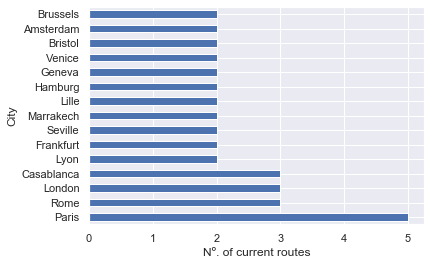

In [52]:
amount2.head(15).plot.barh(legend=False)
plt.xlabel('Nº. of current routes')
plt.ylabel('City')

Text(0, 0.5, 'Number of destinations')

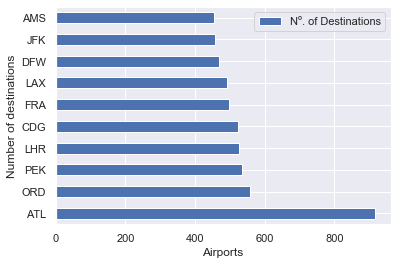

In [22]:
destinations1.head(10).plot.barh()
plt.xlabel('Airports')
plt.ylabel('Number of destinations')

In [23]:
# Sorting data from Destination airports
destin = df.sort_values(by=['Destination Airport'])
destin.head()


,Airline,Source Airport,Destination Airport,Location,Area
10135,AH,CDG,AAE,Annaba,Africa
10181,AH,IST,AAE,Annaba,Africa
10189,AH,LYS,AAE,Annaba,Africa
10049,AH,ALG,AAE,Annaba,Africa
10200,AH,MRS,AAE,Annaba,Africa


In [24]:
group_destin = pd.get_dummies(source['Destination Airport']).sum().sort_values(ascending=False)
group_destin.head()

ATL    911
ORD    550
PEK    534
LHR    524
CDG    517
dtype: int64

In [25]:
group_source = pd.get_dummies(source['Source Airport']).sum().sort_values(ascending=False)
group_source.head()

ATL    915
ORD    558
PEK    535
LHR    527
CDG    524
dtype: int64

In [26]:
sources = pd.DataFrame(group_source)

In [27]:
destins = pd.DataFrame(group_destin)
destins.head(10)

,0
ATL,911
ORD,550
PEK,534
LHR,524
CDG,517
LAX,498
FRA,493
DFW,467
JFK,455
AMS,450


In [28]:
destins1 = destins.rename(columns={0: 'Nº. of flights to this airport'})
destins.head(10)

,0
ATL,911
ORD,550
PEK,534
LHR,524
CDG,517
LAX,498
FRA,493
DFW,467
JFK,455
AMS,450


In [29]:
divide = sources / destins
divide

,0
AAE,1.000000
AAL,0.952381
AAN,1.000000
AAQ,1.000000
AAR,1.000000
...,...
ZUH,1.016949
ZUM,1.000000
ZVK,1.000000
ZYI,1.000000


In [30]:
destins1['Nº. of flights from this airport']=sources
destins1['Flight ratio'] = divide
destins1['Airport name'] = destins1.index.map(airport_dict)
destins1['Location'] = destins1.index.map(location_dict)
destins1['Area'] = destins1.index.map(area_dict)
destins1['Hub Size'] = destins1.index.map(role_dict)
#destins1.head(50)

In [32]:
destins1.head(10)

,Nº. of flights to this airport,Nº. of flights from this airport,Flight ratio,Airport name,Location,Area,Hub Size
ATL,911,915.0,1.004391,Hartsfield-Jackson Atlanta International Airport,Atlanta,North America,Large
ORD,550,558.0,1.014545,O'Hare International Airport,Chicago,North America,Large
PEK,534,535.0,1.001873,Beijing Capital International Airport,Beijing,Asia,Large
LHR,524,527.0,1.005725,Heathrow Airport,London,Europe,Large
CDG,517,524.0,1.013540,Charles de Gaulle Airport,Paris,Europe,Large
LAX,498,492.0,0.987952,Los Angeles International Airport,Los Angeles,North America,Large
FRA,493,497.0,1.008114,Frankfurt Airport,Frankfurt,Europe,Large
DFW,467,469.0,1.004283,Dallas/Fort Worth International Airport,Dallas,North America,Large
JFK,455,456.0,1.002198,John F. Kennedy International Airport,New York City,North America,Large
AMS,450,453.0,1.006667,Amsterdam Airport Schiphol,Amsterdam,Europe,Large


In [53]:
complete=destins1.dropna().sort_values(by=['Flight ratio'], ascending = True)

complete1 = complete[complete["Hub Size"]=='Medium'].head(10)
complete1

,Nº. of flights to this airport,Nº. of flights from this airport,Flight ratio,Airport name,Location,Area,Hub Size
YHZ,52,43.0,0.826923,Halifax Stanfield International Airport,Halifax,North America,Medium
CHC,38,34.0,0.894737,Christchurch International Airport,Christchurch,Oceania,Medium
ONT,26,24.0,0.923077,Ontario International Airport,Ontario,North America,Medium
RNO,29,27.0,0.931034,Reno-Tahoe International Airport,Reno,North America,Medium
SDQ,48,45.0,0.937500,Las Américas International Airport,Santo Domingo,Central America,Medium
LCY,66,62.0,0.939394,London City Airport,London,Europe,Medium
TLS,83,78.0,0.939759,Blagnac Airport,Toulouse,Europe,Medium
TFN,34,32.0,0.941176,Tenerife North Airport,Tenerife,Europe,Medium
OAK,57,54.0,0.947368,Metropolitan Oakland International Airport,Oakland,North America,Medium
RHO,86,82.0,0.953488,Rhodes International Airport,Rhodes,Europe,Medium


Text(0, 0.5, 'Location')

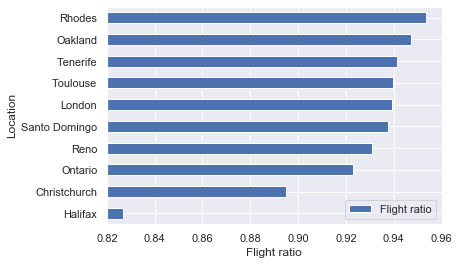

In [83]:
complete1.head(10).plot.barh('Location', 'Flight ratio', xlim= [0.82,0.96])
plt.xlabel('Flight ratio')
plt.ylabel('Location')